<a href="https://colab.research.google.com/github/ChristianConchari/Computer-Vision-Notes/blob/master/Tutorial_4_Edge-Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 4: Edge Detection
Finding edges in an image is one of the most fundamental image processing operations. Edges can provide clues about the elements and meaning of an image. Physically, an edge is the outside limit of an object, area, or surface. But, what is an edge inside a 2D image? They are significant local changes in the image where brightness changes dramatically. These changes represent the boundary between two or more materially distinct regions or physical surfaces.

Conversely, edge detection is a challenging task because edges are not always clear due to lightning and shadows. So, many methods were researched since the 80s. In this tutorial, you'll implement a preliminary set of edge detection methods which are based solely on filters. 


### Import resources and display image

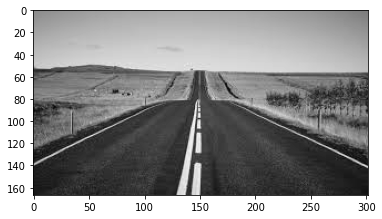

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('road.jpg')

# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### Create a custom kernel and filter the image



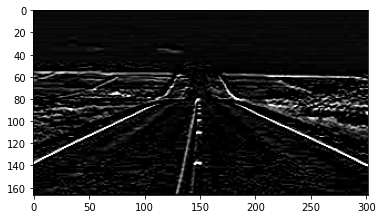

In [ ]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[-1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

### Exercise 1: 
a. Select an image and test out the filters explained in the video titled "3. Filtering": sobel x, sobel y, prewitt x, prewitt y, robinson compass mask, krisch compass mask, laplacian filter. Then, display the filtering results as subplots with plt.subplots. 

Then, answer the following questions:
- Do you notice any result better than the others?
- Which of your filters perform better and why? 
- What happens if you try to implement any point processing method beforehand? 

b. Create a filter with decimal values to detect vertical edges.

c. Create a 5x5 filter to detect horizontal edges

d. Apply these last filters to one of your favourite images. Then, answer the following question: 
- Were the filter's performance better than the previous filters? Why? 

Try to be thoughtful in your analysis. You'll have to copy your answers into the tutorial form. 

SOLUTION:
------------------------
a.) The filters viewed in the video will be implemented.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('road.jpg')

# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Sobel vertical filter
sobel_y = np.array([[-1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])

# Sobel horizontal filter
sobel_x = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

# Prewitt horizontal filter
prewitt_x = np.array([[-1, -1, -1], 
                   [ 0, 0, 0], 
                   [ 1, 1, 1]])

# Prewitt vertical filter
prewitt_y = np.array([[-1, 0, 1], 
                   [ -1, 0, 1], 
                   [ -1, 0, 1]])

# Robinson compass mask - north
robinson_compass_mask_north = np.array([[-1, 0, 1], 
                                        [ -2, 0, 2], 
                                        [ -1, 0, 1]])

# Krisch compass mask - north
krisch_compass_mask_north = np.array([[-3, -3, 5], 
                                        [ -3, 0, 5], 
                                        [ -3, -3, 5]])

# Laplacian filter
laplacian = np.array([[0, 1, 0], 
                      [1, -4, 1], 
                      [0, 1, 0]])

# Laplacian filter
laplacian2 = np.array([[-1, -1, -1], 
                      [-1, 8, -1], 
                      [-1, -1, -1]])

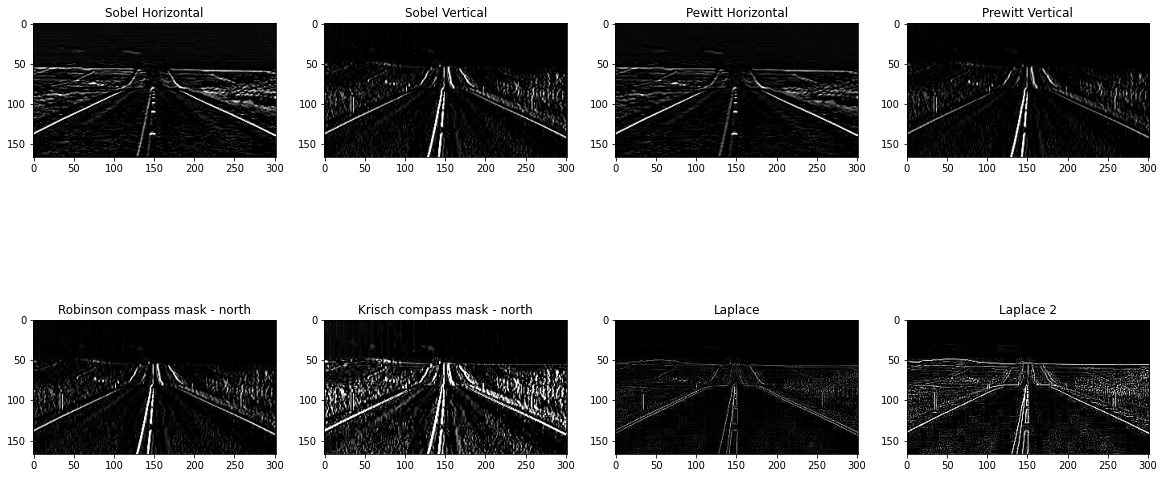

In [ ]:
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
# Sobel horizontal
filtered_image1 = cv2.filter2D(gray, -1, sobel_x)
# Sobel vertical
filtered_image2 = cv2.filter2D(gray, -1, sobel_y)
# Prewitt horizontal
filtered_image3 = cv2.filter2D(gray, -1, prewitt_x)
# Prewitt vertical
filtered_image4 = cv2.filter2D(gray, -1, prewitt_y)
# Robinson compass mask - north
filtered_image5 = cv2.filter2D(gray, -1, robinson_compass_mask_north)
# Krisch compass mask - north
filtered_image6 = cv2.filter2D(gray, -1, krisch_compass_mask_north)
# Laplacian
filtered_image7 = cv2.filter2D(gray, -1, laplacian)
# Laplacian 2
filtered_image8 = cv2.filter2D(gray, -1, laplacian2)

# Plot images
f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20,10)) 
ax1.set_title('Sobel Horizontal')
ax1.imshow(filtered_image1, cmap='gray')
ax2.set_title('Sobel Vertical')
ax2.imshow(filtered_image2, cmap='gray')
ax3.set_title('Pewitt Horizontal')
ax3.imshow(filtered_image3, cmap='gray')
ax4.set_title('Prewitt Vertical')
ax4.imshow(filtered_image4, cmap='gray')
ax5.set_title('Robinson compass mask - north')
ax5.imshow(filtered_image5, cmap='gray')
ax6.set_title('Krisch compass mask - north')
ax6.imshow(filtered_image6, cmap='gray')
ax7.set_title('Laplace')
ax7.imshow(filtered_image7, cmap='gray')
ax8.set_title('Laplace 2')
ax8.imshow(filtered_image8, cmap='gray')

**Do you notice any result better than the others?:**

Depending on the application, the results obtained could be judged differently.  For example, for object detection, if we want to detect the line road contours, the better result will be for Prewitt vertical, and the second Laplace implementation, from my point of view.

**Which of your filters perform better and why?:**

As I see, the best result was got with the second laplacian implementation. On the other hand, the Krisch filter got good results too, but it shows some additional noise.

**What happens if you try to implement any point processing method beforehand?:**

Maybe in some contrast enhancement could be useful to highlight some edges, in case that the raw image has problems of this type. 
Other types of preprocessing may be useful depending on the results that we wanted to get.


b.) To create a filter with decimal values to detect vertical edges.

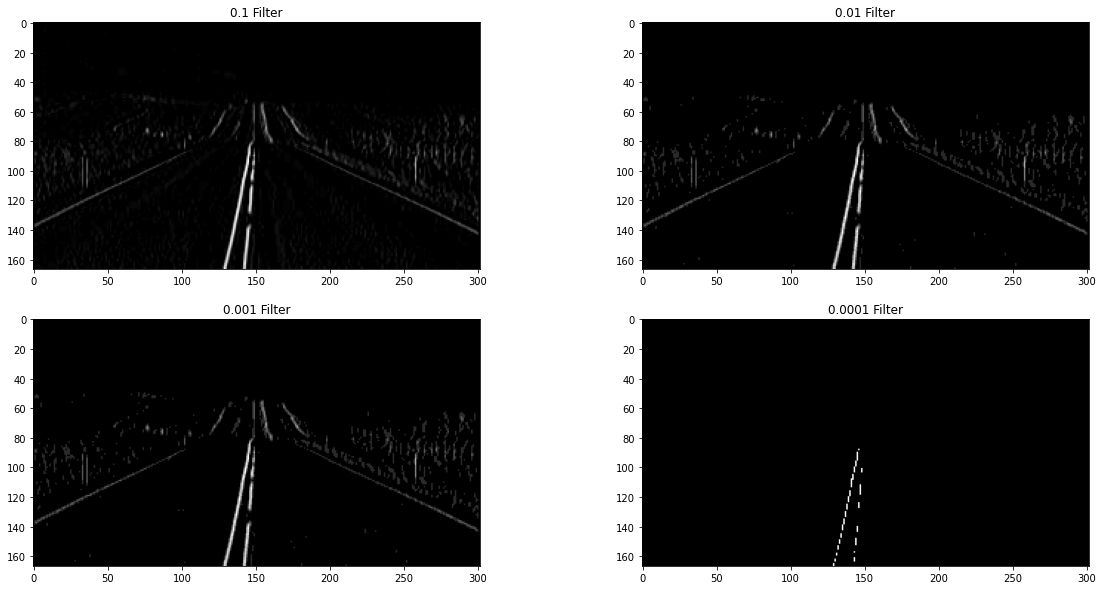

In [ ]:
# Vertical filter with decimals

decimal_y1 = np.array([[-0.1, 0, 0.1], 
                   [ -0.1, 0, 0.1], 
                   [ -0.1, 0, 0.1]])

decimal_y2 = np.array([[-0.01, 0, 0.01], 
                   [ -0.01, 0, 0.01], 
                   [ -0.01, 0, 0.01]])

decimal_y3 = np.array([[-0.01, 0, 0.01], 
                   [ -0.01, 0, 0.01], 
                   [ -0.01, 0, 0.01]])

decimal_y4 = np.array([[-0.001, 0, 0.001], 
                   [ -0.001, 0, 0.001], 
                   [ -0.001, 0, 0.001]])

# Filtered with decimal
filtered_image_decimal1 = cv2.filter2D(gray, -1, decimal_y1)
filtered_image_decimal2 = cv2.filter2D(gray, -1, decimal_y2)
filtered_image_decimal3 = cv2.filter2D(gray, -1, decimal_y3)
filtered_image_decimal4 = cv2.filter2D(gray, -1, decimal_y4)

# Plot the image
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10)) 

ax1.set_title('0.1 Filter')
ax1.imshow(filtered_image_decimal1, cmap='gray')
ax2.set_title('0.01 Filter')
ax2.imshow(filtered_image_decimal2, cmap='gray')
ax3.set_title('0.001 Filter')
ax3.imshow(filtered_image_decimal3, cmap='gray')
ax4.set_title('0.0001 Filter')
ax4.imshow(filtered_image_decimal4, cmap='gray')


c.) Create a 5x5 filter to detect horizontal edges

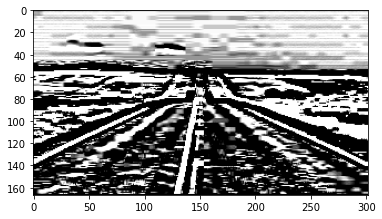

In [ ]:
# Define the kernel
filter_5x5 = np.array([[ -10, -10, -10, -10, -10], 
                   [ 0, 0, 0, 0, 0],
                   [ 0, 0, 0, 0, 0],
                   [ 0, 0, 0, 0, 0], 
                   [ 10, 10, 10, 10, 10]])

filtered_image_5x5 = cv2.filter2D(gray, -1, filter_5x5)

plt.imshow(filtered_image_5x5, cmap='gray')

d. Apply these last filters to one of your favourite images. Then, answer the following question:

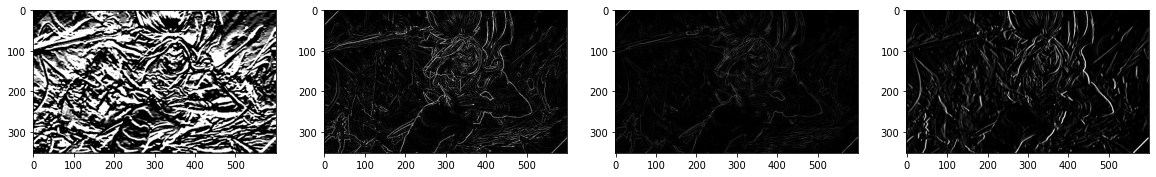

In [ ]:
# Read in the image
image2 = mpimg.imread('yasuomid.jpg')

# Convert to grayscale for filtering
gray2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

filtered_image_favorite1 = cv2.filter2D(gray2, -1, filter_5x5)
filtered_image_favorite2 = cv2.filter2D(gray2, -1, laplacian2)
filtered_image_favorite3 = cv2.filter2D(gray2, -1, laplacian)
filtered_image_favorite4 = cv2.filter2D(gray2, -1, prewitt_y)

# Plot the image
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10)) 

ax1.imshow(filtered_image_favorite1, cmap='gray')
ax2.imshow(filtered_image_favorite2, cmap='gray')
ax3.imshow(filtered_image_favorite3, cmap='gray')
ax4.imshow(filtered_image_favorite4, cmap='gray')



With this type of implementation, you can see clearer details of the raw images. But, some contours can be recognized as noisy. In a few words, some edges result highlighted, but the image turns a little bit noisy. Maybe better result will get with the laplacian filter.